# Exercises with Statistics
Some example statistic calculations using Python Notebook

In [1]:
# Our standard setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats

## Simulating Dice Throws

In [4]:
dice = stats.randint(1,7)
dice.rvs(1000).max()

6

### What's the probability of a die rolling 4?

In [5]:
# Probability Mass Function to the rescue
dice.pmf(4)

0.16666666666666666

### What's the probability of rolling 4 or below?

In [6]:
# Cumulative Density Function
dice.cdf(4)

0.66666666666666663

### What's the probability of rolling between 2 and 4 (inclusive)?

In [7]:
dice.cdf(4) - dice.cdf(1)

0.5

## Histograms

In [9]:
x = np.random.uniform(0.0, 1.0, 50)
x

array([ 0.18148973,  0.92582366,  0.62352669,  0.98927576,  0.01404839,
        0.40041122,  0.62890352,  0.04116906,  0.73632077,  0.66534474,
        0.75754067,  0.2807199 ,  0.11436075,  0.65523264,  0.44122811,
        0.03941724,  0.0118679 ,  0.24076048,  0.40339873,  0.02956519,
        0.88576675,  0.37271974,  0.74984275,  0.30870207,  0.04939138,
        0.23675138,  0.06349827,  0.46951758,  0.88341778,  0.17639793,
        0.4035567 ,  0.55720595,  0.2809107 ,  0.7480494 ,  0.62611526,
        0.68112   ,  0.28789957,  0.95655792,  0.2628906 ,  0.18087404,
        0.54251214,  0.79894142,  0.3565414 ,  0.96234599,  0.50566826,
        0.13752796,  0.97977339,  0.09012719,  0.89275276,  0.43571691])

(array([ 8.,  5.,  6.,  4.,  5.,  3.,  6.,  4.,  3.,  6.]),
 array([ 0.0118679 ,  0.10960868,  0.20734947,  0.30509026,  0.40283104,
         0.50057183,  0.59831261,  0.6960534 ,  0.79379418,  0.89153497,
         0.98927576]),
 <a list of 10 Patch objects>)

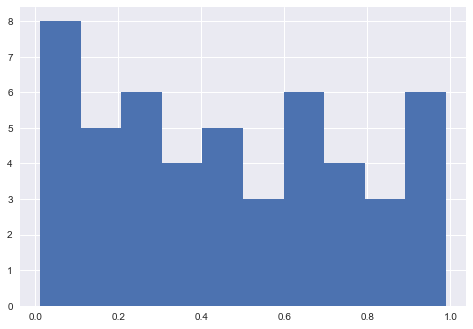

In [10]:
plt.hist(x)

## Basic Metrics
Let's look at a few data sets and compute some descriptive statistics

In [11]:
prices_pd = pd.read_csv("data/Wheat_Price.csv", parse_dates=[-1])
demography_pd = pd.read_csv("data/Demographics_State.csv")
population_pd = pd.read_csv("data/Population_State.csv")

In [12]:
prices_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [13]:
prices_pd.tail()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31
22897,Wisconsin,350.52,2244,272.71,2221,NaN,167,2014-12-31
22898,Wyoming,322.27,131,351.86,197,NaN,12,2014-12-31


In [14]:
demography_pd.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [15]:
population_pd.head()

,region,value
0,alabama,4777326
1,alaska,711139
2,arizona,6410979
3,arkansas,2916372
4,california,37325068


In [16]:
prices_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

### Clean the data and sort it

In [17]:
prices_pd.sort_values(by=['State', 'date'], inplace=True)
prices_pd.fillna(method='ffill', inplace=True)

## Finding descriptive statistics for the state of California
### Mean

In [18]:
california_pd = prices_pd[prices_pd.State == "California"].copy(True)
california_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20098,California,248.77,12021,193.44,12724,193.88,770,2013-12-27
20863,California,248.74,12025,193.44,12728,193.88,770,2013-12-28
21577,California,248.76,12047,193.55,12760,193.60,772,2013-12-29
22291,California,248.82,12065,193.54,12779,193.80,773,2013-12-30
22801,California,248.76,12082,193.54,12792,193.80,773,2013-12-31


In [19]:
ca_sum = california_pd['HighQ'].sum()

In [20]:
ca_count = california_pd['HighQ'].count()

In [21]:
ca_mean = ca_sum / ca_count
print("Mean wheat price in CA is:", ca_mean)

Mean wheat price in CA is: 245.376124722


What about the mean price of high quality wheat in the year 2015?

In [22]:
california_pd['year'] = pd.DatetimeIndex(california_pd['date']).year

In [23]:
cal_15 = california_pd[california_pd.year == 2015]
cal_15['HighQ'].mean()

242.806625

### Median
The value or quantity lying at the midpoint of a frequency distribution or, simply put, the *middle* value in the list of numbers.

In [24]:
ca_count

449

In [25]:
ca_highq_pd = california_pd.sort_values(by=['HighQ'])
ca_highq_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
19027,California,241.84,18419,187.90,21965,188.6,1229,2015-05-26,2015
19741,California,241.85,18450,187.90,21993,188.6,1231,2015-05-27,2015
8011,California,241.87,18066,188.86,21561,188.6,1212,2015-05-11,2015
8827,California,241.87,18073,188.89,21584,188.6,1213,2015-05-12,2015
18313,California,241.88,18398,187.85,21949,188.6,1228,2015-05-25,2015


In [26]:
ca_median = ca_highq_pd.HighQ.iloc[int((ca_count) / 2)]
print("Median price of wheat in CA is:", ca_median)

Median price of wheat in CA is: 245.31


### Mode
The number which appears most often in a set of numbers

In [27]:
ca_mode = ca_highq_pd.HighQ.value_counts().index[0]
print ("The most common price is CA, as indicated by its mode, is:", ca_mode)

The most common price is CA, as indicated by its mode, is: 245.05


### Variance

$$\text{Sample variance} = s^2 = \frac{\sum (X-\bar{X})^2}{n-1} $$

In [28]:
california_pd['HighQ_dev'] = (california_pd['HighQ'] - ca_mean) ** 2

In [29]:
ca_HighQ_variance = california_pd.HighQ_dev.sum() / (ca_count - 1)
print ("Variance of High Quality wheat prices in CA is:", ca_HighQ_variance)

Variance of High Quality wheat prices in CA is: 2.98268628798


## Or, we could just use Pandas built-in functions

In [30]:
california_pd.describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,year,HighQ_dev
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,245.376125,14947.073497,191.268909,16769.821826,189.783586,976.298441,2014.167038,2.976043
std,1.727046,1656.133565,1.524028,2433.943191,1.598252,120.246714,0.402204,3.961134
min,241.840000,12021.000000,187.850000,12724.000000,187.830000,770.000000,2013.000000,0.000015
25%,244.480000,13610.000000,190.260000,14826.000000,188.600000,878.000000,2014.000000,0.106357
50%,245.310000,15037.000000,191.570000,16793.000000,188.600000,982.000000,2014.000000,0.729103
75%,246.220000,16090.000000,192.550000,18435.000000,191.320000,1060.000000,2014.000000,4.435761
max,248.820000,18492.000000,193.630000,22027.000000,193.880000,1232.000000,2015.000000,12.504178


In [31]:
california_pd.HighQ.mode()

0    245.03
1    245.05
dtype: float64

### Covariance
Covariance measures the (average) covariation between two variables. Covariance describes how far the variables are spread out and the nature of their relationship.

$$\text{Covariance} = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i-\bar{Y})}{n-1}$$


In [32]:
ny_pd = prices_pd[prices_pd['State'] == 'New York'].copy(True)
ny_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20120,New York,351.98,5773,268.83,5786,190.31,479,2013-12-27
20885,New York,351.92,5775,268.83,5786,190.31,479,2013-12-28
21599,New York,351.99,5785,269.02,5806,190.75,480,2013-12-29
22313,New York,352.02,5791,268.98,5814,190.75,480,2013-12-30
22823,New York,351.97,5794,268.93,5818,190.75,480,2013-12-31


In [33]:
ny_pd = ny_pd.ix[:,[1,7]]
ny_pd.columns = ['NY_HighQ', 'date']

/Users/meb/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [34]:
ny_pd.head()

,NY_HighQ,date
20120,351.98,2013-12-27
20885,351.92,2013-12-28
21599,351.99,2013-12-29
22313,352.02,2013-12-30
22823,351.97,2013-12-31


In [35]:
ca_ny_pd = pd.merge(california_pd.ix[:,[1,7]].copy(), ny_pd, on="date")
ca_ny_pd.rename(columns={"HighQ": "CA_HighQ"}, inplace=True)
ca_ny_pd.head()

/Users/meb/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,CA_HighQ,date,NY_HighQ
0,248.77,2013-12-27,351.98
1,248.74,2013-12-28,351.92
2,248.76,2013-12-29,351.99
3,248.82,2013-12-30,352.02
4,248.76,2013-12-31,351.97


In [36]:
ny_mean = ca_ny_pd.NY_HighQ.mean()
ny_mean

346.91276169265035

In [38]:
ca_ny_pd['ca_dev'] = ca_ny_pd['CA_HighQ'] - ca_mean
ca_ny_pd.head()

,CA_HighQ,date,NY_HighQ,ca_dev
0,248.77,2013-12-27,351.98,3.393875
1,248.74,2013-12-28,351.92,3.363875
2,248.76,2013-12-29,351.99,3.383875
3,248.82,2013-12-30,352.02,3.443875
4,248.76,2013-12-31,351.97,3.383875


In [39]:
ca_ny_pd['ny_dev'] = ca_ny_pd['NY_HighQ'] - ny_mean
ca_ny_pd.head()

,CA_HighQ,date,NY_HighQ,ca_dev,ny_dev
0,248.77,2013-12-27,351.98,3.393875,5.067238
1,248.74,2013-12-28,351.92,3.363875,5.007238
2,248.76,2013-12-29,351.99,3.383875,5.077238
3,248.82,2013-12-30,352.02,3.443875,5.107238
4,248.76,2013-12-31,351.97,3.383875,5.057238


In [41]:
ca_ny_cov = (ca_ny_pd['ca_dev'] * ca_ny_pd['ny_dev']).sum() / (ca_count - 1)
print("Covariance of the High Quality wheat prices in CA and NY is:", ca_ny_cov)

Covariance of the High Quality wheat prices in CA and NY is: 5.91681496729


### And using Pandas built-in function

In [42]:
ca_ny_pd.cov()

,CA_HighQ,NY_HighQ,ca_dev,ny_dev
CA_HighQ,2.982686,5.916815,2.982686,5.916815
NY_HighQ,5.916815,12.245147,5.916815,12.245147
ca_dev,2.982686,5.916815,2.982686,5.916815
ny_dev,5.916815,12.245147,5.916815,12.245147


## Correlation
Like covariance, the correlation describes which two or more variables change together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

$$r = \frac{1}{n-1}\sum \Big( \frac{x-\bar{x}}{s_x}\Big) \Big( \frac{y-\bar{y}}{s_y}\Big)$$

where $\bar{x}$ and $\bar{y}$ are the sample means of X and Y, and $s_x$ and $x_y$ are the sample standard deviations of X and Y.

### The correlation between wheat prices in New York and California

In [43]:
ca_highq_std = ca_ny_pd.CA_HighQ.std()
ny_highq_std = ca_ny_pd.NY_HighQ.std()

ca_ny_corr = ca_ny_cov / (ca_highq_std * ny_highq_std)
print("Correlation between wheat prices in NY and CA:", ca_ny_corr)

Correlation between wheat prices in NY and CA: 0.979043961106


In [44]:
ca_ny_pd.corr()

,CA_HighQ,NY_HighQ,ca_dev,ny_dev
CA_HighQ,1.000000,0.979044,1.000000,0.979044
NY_HighQ,0.979044,1.000000,0.979044,1.000000
ca_dev,1.000000,0.979044,1.000000,0.979044
ny_dev,0.979044,1.000000,0.979044,1.000000


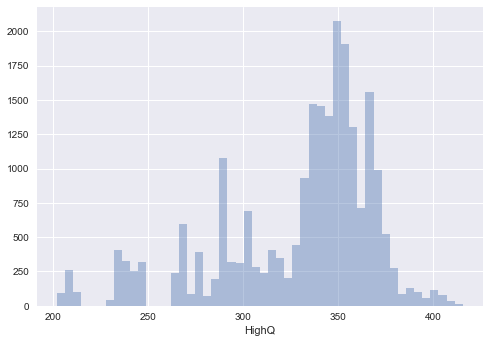

In [45]:
sns.distplot(prices_pd.HighQ, kde=False)

In [46]:
prices_pd["month"] = prices_pd["date"].apply(lambda x: x.month)
prices_pd["year"] = prices_pd["date"].apply(lambda x: x.year)

In [47]:
prices_jan2015 = prices_pd.loc[(prices_pd.month==1) & (prices_pd.year==2015), ["State", "HighQ"]].groupby("State").mean().reset_index()

In [48]:
prices_jan2015

,State,HighQ
0,Alabama,336.504839
1,Alaska,302.972581
2,Arizona,297.782903
3,Arkansas,341.705806
4,California,243.602258
5,Colorado,243.273226
6,Connecticut,336.442258
7,Delaware,363.908387
8,District of Columbia,348.107097
9,Florida,300.604194


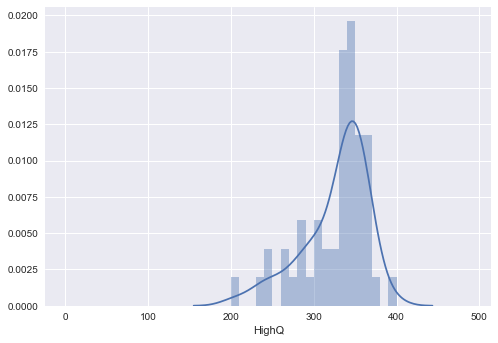

In [49]:
sns.distplot(prices_jan2015.HighQ, bins=range(0,500,10), kde=True)

In [50]:
prices_jan2015['price'] = prices_jan2015.HighQ.apply(lambda x: int(x))

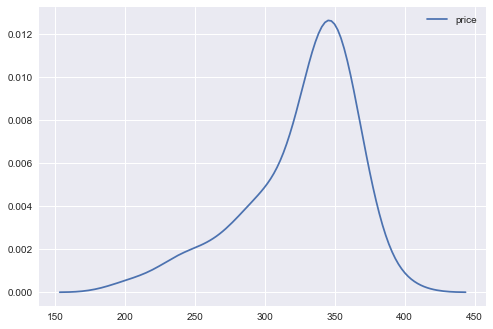

In [51]:
sns.kdeplot(prices_jan2015.price)